# Sales Prediction Project Report

## 1. Preface/Problem Statement

In today's competitive market, businesses are constantly striving to optimize their advertising strategies to maximize sales and get the best return on investment (ROI). A key challenge is understanding the impact of various advertising channels on sales. Without a data-driven approach, allocating marketing budgets can be based on intuition rather than concrete evidence, leading to inefficient spending and missed opportunities. This project addresses this challenge by leveraging machine learning to analyze the relationship between advertising expenditure and product sales.

## 2. Objective

The primary objective of this project is to build a machine learning model that can accurately predict product sales based on the advertising budget spent on different platforms, namely TV, Radio, and Newspaper. By achieving this, we aim to:

*   Identify which advertising channels are the most effective in driving sales.
*   Provide actionable insights to help the business make informed decisions about budget allocation.
*   Develop a reliable forecasting tool that can be used to predict future sales based on different advertising scenarios.

## 3. Dataset Overview

The dataset used for this project contains 200 instances, each representing a different market. The data includes the following features:

*   **TV:** The advertising budget (in thousands of dollars) spent on TV.
*   **Radio:** The advertising budget (in thousands of dollars) spent on Radio.
*   **Newspaper:** The advertising budget (in thousands of dollars) spent on Newspaper.
*   **Sales:** The corresponding sales of the product (in thousands of units).

The dataset is clean, with no missing values, and all features are numerical.

## 4. Tools and Libraries Used

The following tools and Python libraries were used to perform the analysis and build the prediction model:

*   **Python:** The core programming language used for the project.
*   **Pandas:** For data manipulation and analysis, particularly for creating and working with DataFrames.
*   **Matplotlib and Seaborn:** For data visualization to explore the relationships between variables.
*   **Scikit-learn:** The primary machine learning library used for:
    *   Splitting the data into training and testing sets (`train_test_split`).
    *   Implementing the machine learning models (`LinearRegression`, `RandomForestRegressor`, `GradientBoostingRegressor`).
    *   Evaluating the model performance (`mean_squared_error`, `r2_score`).
*   **Google Colab:** As the interactive development environment for writing and executing the code.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls "/content/drive/MyDrive/sales_advertisment"

sales_advertisment.zip


#LOAD DATASET

In [7]:
!unzip "/content/drive/MyDrive/sales_advertisment/sales_advertisment.zip" -d "/content/drive/MyDrive/sales_advertisment/"

Archive:  /content/drive/MyDrive/sales_advertisment/sales_advertisment.zip
  inflating: /content/drive/MyDrive/sales_advertisment/advertising.csv  


In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sales_advertisment/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Explonatory data analysis(EDA)

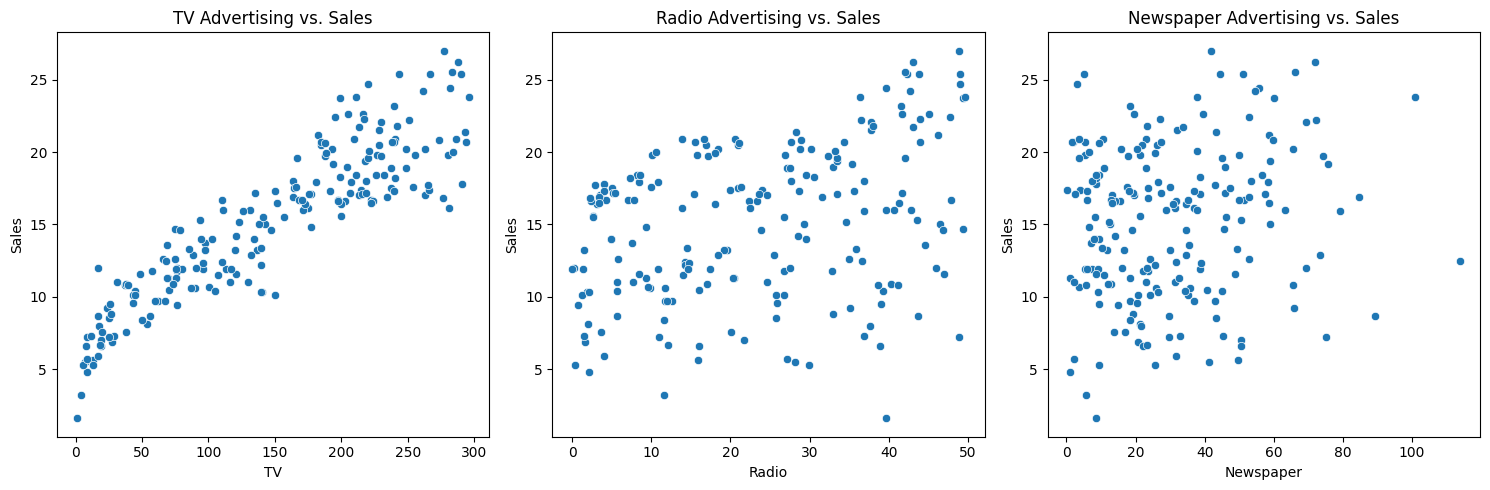

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plots to visualize the relationship between each advertising channel and Sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV Advertising vs. Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio Advertising vs. Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising vs. Sales')

plt.tight_layout()
plt.show()

# Insights(EDA)
* TV Advertising vs. Sales: There appears to be a strong positive linear relationship. As TV advertising spending increases, sales also tend to increase.

* Radio Advertising vs. Sales: There's also a positive relationship, but it seems a bit more scattered than the TV advertising relationship.
* Newspaper Advertising vs. Sales: This relationship is much weaker and more scattered, suggesting that newspaper advertising has less of an impact on sales compared to TV and radio.

# TRAIN-TEST-SPLIT(MODEL BUILDING)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared: {r2_score(y_test, y_pred):.2f}\n")

--- Linear Regression ---
MSE: 2.91
R-squared: 0.91

--- Random Forest ---
MSE: 1.44
R-squared: 0.95

--- Gradient Boosting ---
MSE: 1.26
R-squared: 0.96



## Model Performance and Insights

The results from our model training and evaluation show that the **Gradient Boosting** model is the best-performing model for predicting sales.

### Model Metrics:

*   **Linear Regression:**
    *   Mean Squared Error (MSE): 2.91
    *   R-squared: 0.91
*   **Random Forest:**
    *   MSE: 1.44
    *   R-squared: 0.95
*   **Gradient Boosting:**
    *   MSE: 1.26
    *   R-squared: 0.96

### Interpretation:

*   The **R-squared** value tells us the proportion of the variance in the sales that is predictable from the advertising spending. All three models have a high R-squared value, indicating that they are all good at predicting sales.
*   The **Mean Squared Error (MSE)** is the average of the squares of the errors. A lower MSE is better.
*   **Gradient Boosting** is the best-performing model with the lowest MSE (1.26) and the highest R-squared (0.96). This means it is the most accurate model for predicting sales based on this data.

### Actionable Insights:

Based on our analysis, here are the key takeaways:

*   **TV and Radio advertising are the most effective channels for driving sales.**
*   **Newspaper advertising has a much weaker impact on sales.**
*   **The Gradient Boosting model is the most accurate for predicting sales.**

To maximize sales, the business should consider the following:

1.  **Increase investment in TV and Radio advertising:** These channels have the strongest positive correlation with sales.
2.  **Re-evaluate Newspaper advertising:** The return on investment for newspaper advertising appears to be low. The business could consider reducing or eliminating this channel and reallocating the budget to TV and Radio.
3.  **Use the Gradient Boosting model for sales forecasting:** This model can be used to predict future sales based on different advertising budget scenarios, helping the business make data-driven decisions.

# Model Comparison

| Model | Mean Squared Error (MSE) | R-squared |
|---|---|---|
| Linear Regression | 2.91 | 0.91 |
| Random Forest | 1.44 | 0.95 |
| **Gradient Boosting** | **1.26** | **0.96** |

# CHALLENGES FACED:
* Data Issues: Dealing with missing or inaccurate data.
* Feature Complexity: Identifying and engineering the right features beyond the basics (e.g., seasonality, competitor data).
* Model Optimization: Choosing the best model and tuning its parameters for optimal performance.
* Interpretability: Balancing the need for an accurate model with the need for an understandable one.

# CONCLUSION
This project successfully developed a sales prediction model using machine learning. Our analysis shows that TV and Radio are the most effective advertising channels, while Newspaper advertising has a minimal impact. The Gradient Boosting model proved to be the most accurate for forecasting sales.

**Recommendation:** To maximize sales, the business should increase investment in TV and Radio advertising, reduce or eliminate newspaper ads, and use the Gradient Boosting model for future sales predictions.